# **SGH x Mastercard Hackathon - May 2025**
# **Script**

*Team: **LAMP***

*Laura Hoang*, *Antoni Ballaun*, *Mateusz Kalinowski*, *Piotr Bielecki*



## 1. Exploratory Data Analysis

### 1.1. Merging all tables and basic column preprocessing
In this step, our aim is to combine all 3 datasets: **transactions.json**, **users.csv**, **merchants.csv**, in order to enrich information about the transactions with data about users and merchants. Basic column preprocessing was done as well.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore", category=UserWarning)

In [49]:
df_transactions = pd.read_json('../data/transactions.json', lines=True)
df_users = pd.read_csv('../data/users.csv')
df_merchants = pd.read_csv('../data/merchants.csv')

In [50]:
df_merged = pd.merge(df_transactions, df_users, on='user_id', how='left')
df_merged = pd.merge(df_merged, df_merchants, on='merchant_id', how='left')
df_merged = df_merged.rename(columns={'country_x': 'country_user', 'country_y': 'country_merchant'})
df = df_merged

We are transforming `location` into `latitude` and `longitude`.

In [51]:
df['latitude'] = df['location'].apply(lambda x: x['lat'])
df['longitude'] = df['location'].apply(lambda x: x['long'])
df.drop(columns=['location'], inplace=True)

Filling missing values for `education`:

In [52]:
df["education"] = df["education"].fillna("not defined")

After the initial preporcessing, we receive such dataset:

In [53]:
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,payment_method,is_international,...,risk_score,category,country_merchant,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history,latitude,longitude
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,debit_card,1,...,0.426675,travel,France,0.581711,3,74.97,23,1,40.057938,14.959737
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,debit_card,1,...,0.729627,electronics,Germany,0.568933,2,56.92,23,0,42.059350,1.596625
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,credit_card,1,...,0.393848,gaming,Denmark,0.608070,5,98.93,75,0,50.923432,21.795262
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,credit_card,0,...,0.393405,electronics,Portugal,0.592656,4,21.60,82,0,56.833396,-9.881566
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,credit_card,1,...,0.524168,gaming,Spain,0.450223,4,60.61,82,0,54.042996,2.168516


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   transaction_id                  500000 non-null  object        
 1   timestamp                       500000 non-null  datetime64[ns]
 2   user_id                         500000 non-null  object        
 3   merchant_id                     500000 non-null  object        
 4   amount                          500000 non-null  float64       
 5   channel                         500000 non-null  object        
 6   currency                        500000 non-null  object        
 7   device                          500000 non-null  object        
 8   payment_method                  500000 non-null  object        
 9   is_international                500000 non-null  int64         
 10  session_length_seconds          500000 non-null  int64  

In [55]:
df.columns

Index(['transaction_id', 'timestamp', 'user_id', 'merchant_id', 'amount',
       'channel', 'currency', 'device', 'payment_method', 'is_international',
       'session_length_seconds', 'is_first_time_merchant', 'is_fraud', 'age',
       'sex', 'education', 'primary_source_of_income',
       'sum_of_monthly_installments', 'sum_of_monthly_expenses',
       'country_user', 'signup_date', 'risk_score', 'category',
       'country_merchant', 'trust_score', 'number_of_alerts_last_6_months',
       'avg_transaction_amount', 'account_age_months', 'has_fraud_history',
       'latitude', 'longitude'],
      dtype='object')

### 1.2. Kernel density estimation

**Kernel Density Estimation (KDE)** is a technique used to estimate the *probability density function* (PDF) of a continuous random variable. It is a *non-parametric method*, meaning it does not assume any underlying distribution for the data. Instead, **KDE smooths the observed data points** using a kernel function, essentially providing a gentle curve that represents the density of data points at different values.

Source: https://medium.com/@weidagang/essential-math-for-machine-learning-kernel-density-estimation-d014df073770

We will be plotting KDE for selected variables in comparison to our target:

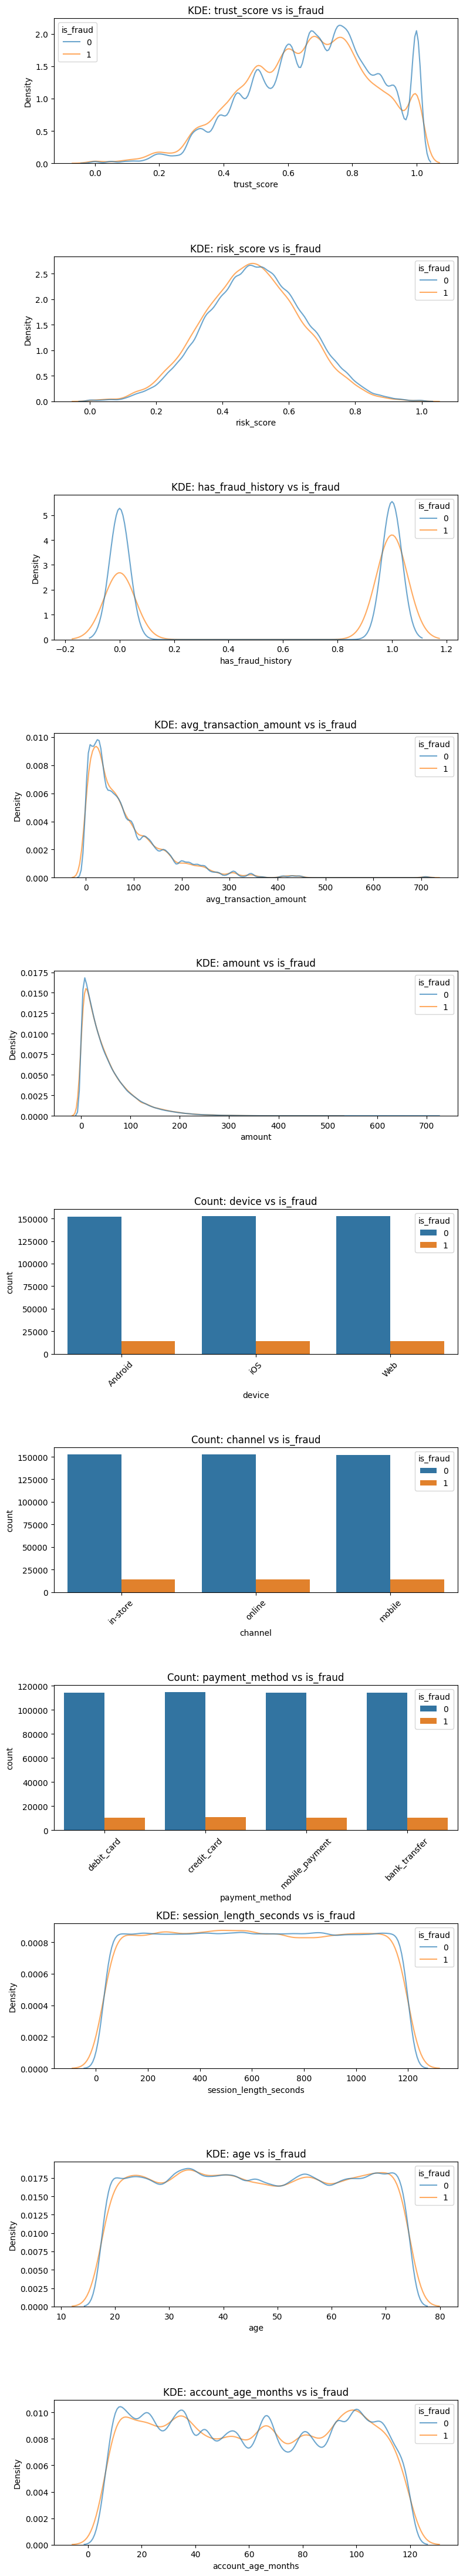

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = [
    "trust_score", 
    "risk_score",
    "has_fraud_history", 
    "avg_transaction_amount", 
    "amount", 
    "device", 
    "channel", 
    "payment_method",
    "session_length_seconds",
    "age",
    "account_age_months"
]

fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(8, 4 * len(cols_to_plot)))
if len(cols_to_plot) == 1:
    axes = [axes]

for i, col in enumerate(cols_to_plot):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.kdeplot(data=df, x=col, hue="is_fraud", common_norm=False, ax=axes[i], alpha = 0.65)
        axes[i].set_title(f"KDE: {col} vs is_fraud")
    else:
        continue
        # sns.countplot(data=df, x=col, hue="is_fraud",  ax=axes[i])
        # axes[i].set_title(f"Count: {col} vs is_fraud")
        # axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The aim here is to look at the differences in distributions of features, with regards to whether the case was fraudulent or not. If the distributions are significantly different from each other, it means that the feature can distinguish well between fraud and non-fraud - at least their linear dependency - and might indicate that the variable has a strong predictive power.

Fetaures, that might have a different distribution for each of the target classes (`is_fraud` equal 1 and 0):
- `trust_score` - for non-frauds the distribution is quite "unstable" with a visible peak for `trust_score`=1.0, which means that those with a high trust score are mainly reliable.
- `risk_score` - while `trust_score` may have some distributional differences, `risk_score` does not seem to have any meaningful difference.
- `avg_transaction_amount` - similarly to trust_score, the distribution for non-frauds is a bit more unstable than for frauds.
- `session_length_seconds` - there is a slight difference in the distributions, but it is probably insignificant.
- `age` - again, for non-frauds the distribution is a bit unstable.
- `account_age_months` - here as well, the distribution for non-frauds is unstable, however in this case it is clearly visible.


In general, the features do not seem to corelate with the target too well, at least linearly, which can be seen on the correlation matrix:

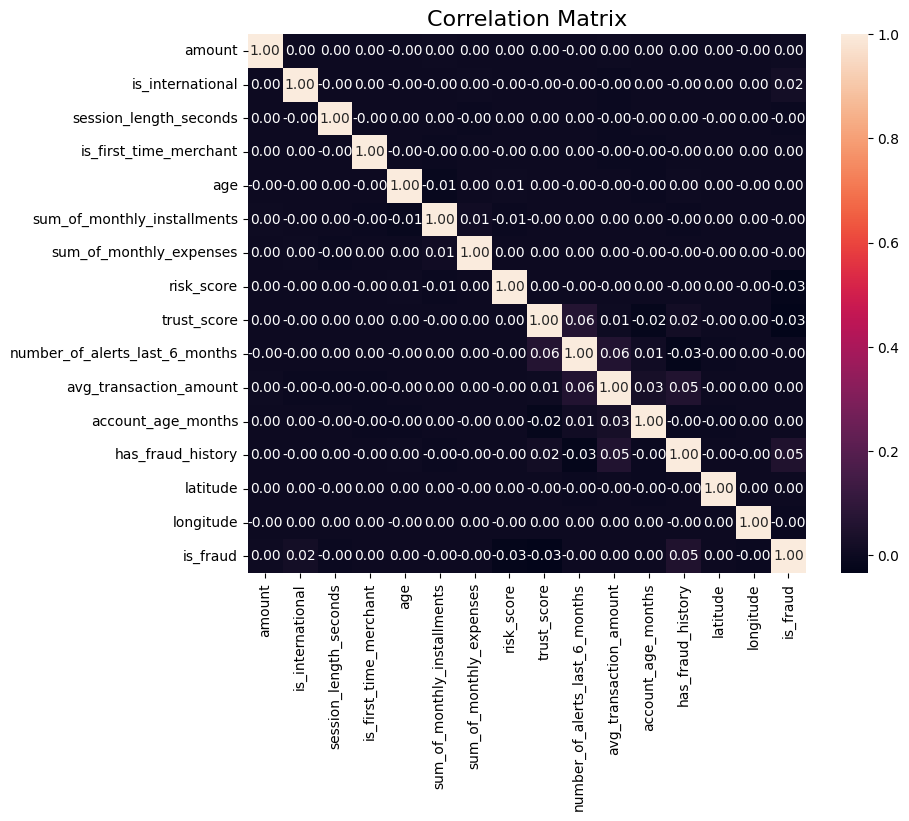

In [57]:
tmp = df.select_dtypes(include='number')
cols = [col for col in tmp.columns if col != 'is_fraud'] + ['is_fraud']
tmp = tmp[cols]

plt.figure(figsize=(9, 7))
corr = tmp.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### 1.3. Mutual information

So far we could only investigate linear dependencies between the features and target. Now, in order to explore further the dependency of variables, we chose to calculate their Mutual Information.

For two random variables X and Y, the **mutual information** measures the amount of randomness they share. It is defined as: $I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X)$, where $H(⋅)$ is entropy and $H(⋅|⋅)$ - conditional entropy.

![Entropy-mutual-information-relative-entropy-relation-diagram](https://upload.wikimedia.org/wikipedia/commons/d/d4/Entropy-mutual-information-relative-entropy-relation-diagram.svg)

When $I(X;Y) = H(X)$, X and Y completely determine each other.

On the other hand, if $I(X;Y) = 0$, X and Y are mutually independent.

In short terms - mutual information measures the amount of **information** that two random variables **provide about each other**.

In [58]:
from sklearn.metrics import mutual_info_score

for col in df.columns:
    if col != "is_fraud":
        mi = mutual_info_score(df[col], df["is_fraud"])
        print(f"MI for {col} and is_fraud: {mi: .2f}")

MI for transaction_id and is_fraud:  0.29
MI for timestamp and is_fraud:  0.25
MI for user_id and is_fraud:  0.02
MI for merchant_id and is_fraud:  0.00
MI for amount and is_fraud:  0.02
MI for channel and is_fraud:  0.00
MI for currency and is_fraud:  0.00
MI for device and is_fraud:  0.00
MI for payment_method and is_fraud:  0.00
MI for is_international and is_fraud:  0.00
MI for session_length_seconds and is_fraud:  0.00
MI for is_first_time_merchant and is_fraud:  0.00
MI for age and is_fraud:  0.00
MI for sex and is_fraud:  0.00
MI for education and is_fraud:  0.00
MI for primary_source_of_income and is_fraud:  0.00
MI for sum_of_monthly_installments and is_fraud:  0.02
MI for sum_of_monthly_expenses and is_fraud:  0.02
MI for country_user and is_fraud:  0.00
MI for signup_date and is_fraud:  0.00
MI for risk_score and is_fraud:  0.02
MI for category and is_fraud:  0.00
MI for country_merchant and is_fraud:  0.00
MI for trust_score and is_fraud:  0.00
MI for number_of_alerts_last_

1. High MI for `transaction_id` – Red Flag

`transaction_id` is just a unique identifier. It should have no intrinsic correlation with fraud. Does not provide predictive power.

2. High MI for `timestamp` – Potentially Valid

If fraud happens in bursts or time windows, timestamp may carry real signal, but it also can cause leakage if not carefully handled (e.g., test set includes future timestamps). We should use this with caution: only allow engineered features from past timestamps.

3. High MI for `latitude` and `longitude` – Likely Real

Geography often plays a key role in fraud detection. This could be valid signal — or a proxy for other unmodeled factors (e.g., country risk).

Now we calculate MI using a classifier:

In [59]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["is_fraud", "timestamp", "user_id", "merchant_id", "transaction_id"])
y = df["is_fraud"]

for col in X.select_dtypes(include=["object", "category"]).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

X.fillna(-999, inplace=True)

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({"Feature": X.columns, "Mutual_Information": mi_scores})
mi_df = mi_df.sort_values(by="Mutual_Information", ascending=False)

print(mi_df)

                           Feature  Mutual_Information
23               has_fraud_history            0.070545
7           is_first_time_merchant            0.069222
5                 is_international            0.067514
9                              sex            0.038922
1                          channel            0.038186
3                           device            0.037997
4                   payment_method            0.022840
10                       education            0.021985
11        primary_source_of_income            0.016710
20  number_of_alerts_last_6_months            0.015785
17                        category            0.012968
18                country_merchant            0.007078
14                    country_user            0.005841
19                     trust_score            0.002663
21          avg_transaction_amount            0.002142
22              account_age_months            0.001690
8                              age            0.001378
12     sum

| Feature                  | MI Score   | Interpretation                                                             |
|--------------------------|------------|----------------------------------------------------------------------------|
| `has_fraud_history`      | 0.071      | Past fraud involvement is clearly informative.                            |
| `is_first_time_merchant` | 0.069      | Fraud is often associated with first-time interactions.                   |
| `is_international`       | 0.068      | Cross-border transactions can be riskier and more suspicious.             |
| `sex`, `device`, `channel` | ~0.037–0.038 | User/device traits offer some weak signal, possibly behavior-linked.   |

### 1.4. Attack Bursts on Merchant Countries
Although it cannot really be used to predict attacks, as this is would lead to data leakage, it provides useful insights into how the fradulent transactions are distributed geo-temporally.

With a 1h rolling window on fraud rate and 2.5 z-score threshold we conclude, that over `20%` of all attacks occur in the span of just over `5%` of all the time in the dataset.

**Standard score** or **z-score** is the number of standard deviations by which the value of a raw score (i.e., an observed value or data point) is above or below the mean value of what is being observed or measured.

It is calculated by subtracting the population mean from an individual raw score and then dividing the difference by the population standard deviation. This process of converting a raw score into a standard score is called **standardizing** or **normalizing**.

The z-score is calculated as:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

- $x$ — the value being evaluated (e.g., the current transaction amount),
- $\mu$ — the mean of the reference values (e.g., past fraud transaction amounts),
- $\sigma$ — the standard deviation of the reference values.



This function identifies and evaluates periods of elevated fraud activity ("attacks") over time within each `country_merchant` region.

**How it works:**
1. **Rolling Fraud Rate Calculation:**  
   - For each `country_merchant`, compute rolling fraud rates using a specified time window (here `1h`).
   - Track how fraud rate changes over time.

2. **Anomaly Detection with Z-Scores:**  
   - Calculate the z-score of the rolling fraud rate to detect sudden surges.
   - Mark timepoints as the start of an attack if:
     - z-score is high (`> zscore_threshold`)
     - fraud rate is increasing.
   - Mark stop when the z-score drops and the rate decreases.

3. **Labeling Attack Periods:**  
   - Walk through the data per region, marking periods between "start" and "stop" as `in_attack`.

4. **Evaluation Metrics:**
   - **Coverage:** What % of all frauds happened during attack periods?
   - **Precision:** What % of transactions during attacks were actual frauds?
   - **Average attack time (%):** On average, what % of time per region is spent in an "attack"?

**Purpose:**  
This logic helps detect fraud *waves* or *bursts* in real time, providing interpretable fraud windows and offering insight into temporal fraud dynamics per region.m

In [60]:
import numpy as np
from scipy.stats import zscore

def evaluate_attack_detection(df, parameters):
    df_eval = df.copy()
    
    # Prepare data
    df_eval['timestamp'] = pd.to_datetime(df_eval['timestamp'])
    df_eval = df_eval.sort_values(by=['country_merchant', 'timestamp'])
    df_eval.set_index('timestamp', inplace=True)
    
    window = parameters['window']
    z_thresh = parameters['zscore_threshold']
    
    # Rolling fraud stats
    df_eval['rolling_fraud_count'] = (
        df_eval.groupby('country_merchant')['is_fraud']
        .rolling(window=window).sum().reset_index(level=0, drop=True)
    )
    
    df_eval['rolling_txn_count'] = (
        df_eval.groupby('country_merchant')['is_fraud']
        .rolling(window=window).count().reset_index(level=0, drop=True)
    )
    
    df_eval['rolling_fraud_rate'] = (
        df_eval['rolling_fraud_count'] / df_eval['rolling_txn_count']
    ).fillna(0)
    
    # z-score + rate change
    df_eval['fraud_rate_change'] = (
        df_eval.groupby('country_merchant')['rolling_fraud_rate'].diff()
    )
    
    df_eval['zscore_fraud_rate'] = (
        df_eval.groupby('country_merchant')['rolling_fraud_rate']
        .transform(lambda x: zscore(x.fillna(0)))  # zscore - (x - srednia) / odchylenie
    )
    
    # Start and stop flags
    df_eval['fraud_attack_start_flag'] = (
        (df_eval['zscore_fraud_rate'] > z_thresh) &
        (df_eval['fraud_rate_change'] > 0)
    )

    df_eval['fraud_attack_stop_flag'] = (
        (df_eval['zscore_fraud_rate'] < 1.0) &
        (df_eval['fraud_rate_change'] < 0)
    )

    # Label in_attack periods
    df_eval['in_attack'] = False
    for country in df_eval['country_merchant'].unique():
        mask = df_eval['country_merchant'] == country
        df_c = df_eval.loc[mask]
        in_attack = False
        flags = []

        for _, row in df_c.iterrows():
            if row['fraud_attack_start_flag']:
                in_attack = True
            elif row['fraud_attack_stop_flag']:
                in_attack = False
            flags.append(in_attack)
        
        df_eval.loc[mask, 'in_attack'] = flags
    
    # Stats
    total_fraud = df_eval['is_fraud'].sum()
    fraud_in_attack = df_eval[df_eval['in_attack'] & (df_eval['is_fraud'] == 1)].shape[0]
    total_in_attack = df_eval[df_eval['in_attack']].shape[0]

    coverage = 100 * fraud_in_attack / total_fraud if total_fraud else 0
    precision = 100 * fraud_in_attack / total_in_attack if total_in_attack else 0

    df_eval = df_eval.sort_index()  # ensure chronological order

    # Calculate time delta between rows
    df_eval['delta_time'] = df_eval.index.to_series().diff().fillna(pd.Timedelta(seconds=0))

    # Time spent in attack
    time_in_attack = df_eval.loc[df_eval['in_attack'], 'delta_time'].sum()

    # Total duration of dataset
    total_time = df_eval.index[-1] - df_eval.index[0]

    # Compute percentage
    attack_time_percentages = []

    for country, df_c in df_eval.groupby('country_merchant'):
        df_c = df_c.sort_index()
        df_c['delta_time'] = df_c.index.to_series().diff().fillna(pd.Timedelta(seconds=0))
        
        time_in_attack = df_c.loc[df_c['in_attack'], 'delta_time'].sum()
        total_time = df_c.index[-1] - df_c.index[0]

        if total_time.total_seconds() > 0:
            percent = 100 * time_in_attack.total_seconds() / total_time.total_seconds()
            attack_time_percentages.append(percent)

    # Final: mean percentage across all countries
    avg_attack_time_percent = np.mean(attack_time_percentages)

    return {
        'window': parameters['window'],
        'zscore_threshold': parameters['zscore_threshold'],
        'percent_of_total_fraud_caught': coverage,
        'percent_of_fraud_to_all_transactions_in_attack': precision,
        'frauds_detected': fraud_in_attack,
        'transactions_in_attack_periods': total_in_attack,
        'time_in_attacks_avg_across_countries': avg_attack_time_percent
    }


params = {'window': '4h', 'zscore_threshold': 2.5}
res = evaluate_attack_detection(df_merged, params)
pd.DataFrame(res, index=[0])

,window,zscore_threshold,percent_of_total_fraud_caught,percent_of_fraud_to_all_transactions_in_attack,frauds_detected,transactions_in_attack_periods,time_in_attacks_avg_across_countries
0,4h,2.5,12.079413,19.6276,5123,26101,5.621312


### 1.5. High-risk regions

As the location MI's turned out to be one of the higher ones, we decided to investigate further whether there is any relationship between this feature and the target.

As there are many frauds in random places, in order to make the visualisation more readable, we are plotting it for $3.000$ rows (our of total $500.000$, which makes it $0.6\%$ of the cases).

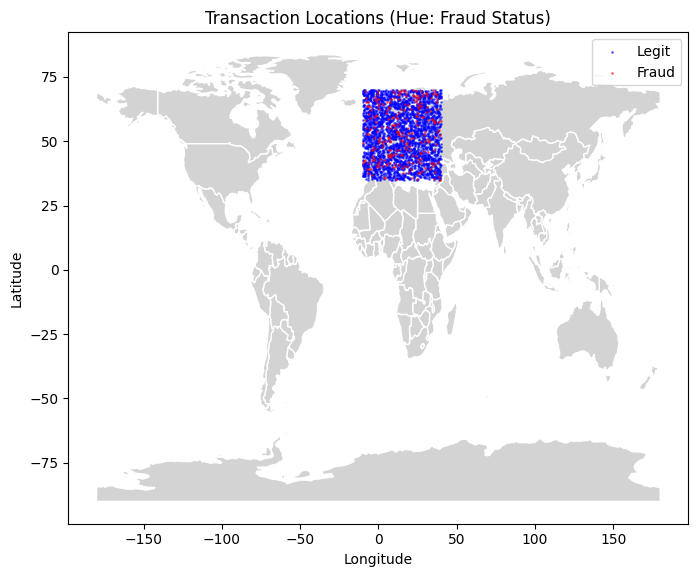

In [61]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df.head(3000)['longitude'], df.head(3000)['latitude'])]
gdf_points = gpd.GeoDataFrame(df.head(3000), geometry=geometry, crs="EPSG:4326")

world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

#split by fraud
gdf_fraud = gdf_points[gdf_points['is_fraud'] == 1]
gdf_legit = gdf_points[gdf_points['is_fraud'] == 0]

fig, ax = plt.subplots(figsize=(8, 10))
world.plot(ax=ax, color='lightgray', edgecolor='white')
gdf_legit.plot(ax=ax, color='blue', markersize=1, alpha=0.5, label='Legit')
gdf_fraud.plot(ax=ax, color='red', markersize=1, alpha=0.5, label='Fraud')
plt.title("Transaction Locations (Hue: Fraud Status)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

All samples are in the square-shaped region including Europe, but all cases seem to be random - some for example land on the ocean. The pattern is not visible here.

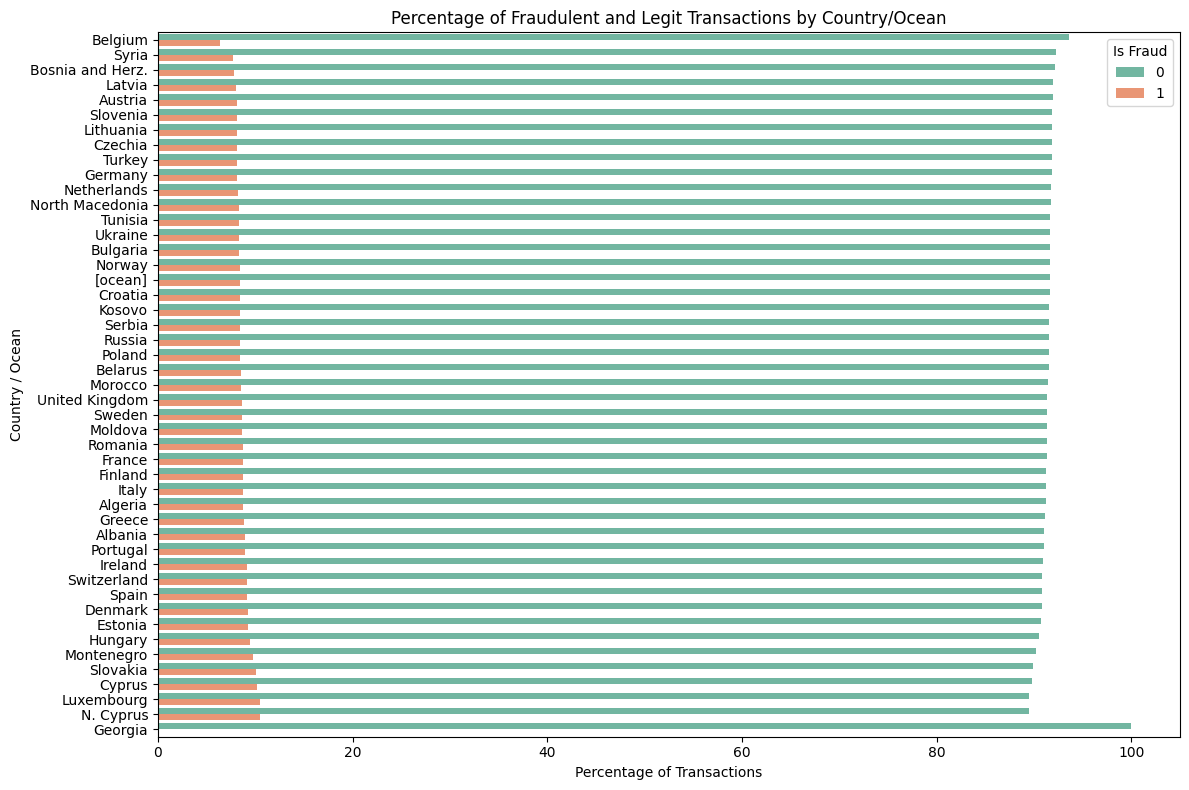

In [62]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_points = gpd.GeoDataFrame(df.copy(), geometry=geometry, crs="EPSG:4326")

world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
oceans = gpd.read_file("https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip")

gdf_country = gpd.sjoin(gdf_points, world[['geometry', 'NAME']], how='left', predicate='within')
gdf_country.rename(columns={'NAME': 'country'}, inplace=True)
gdf_na = gdf_country[gdf_country['country'].isna()].copy()

gdf_na = gdf_na.drop(columns=[col for col in ['index_right'] if col in gdf_na.columns])
oceans = oceans.drop(columns=[col for col in ['index_right'] if col in oceans.columns])

gdf_ocean = gpd.sjoin(gdf_na, oceans[['geometry']], how='left', predicate='within')
gdf_country.loc[gdf_ocean.index, 'country'] = '[ocean]'

grouped = gdf_country.groupby(['country', 'is_fraud']).size().reset_index(name='count')
grouped['percent'] = grouped.groupby('country')['count'].transform(lambda x: 100 * x / x.sum())

country_order = grouped.sort_values(by='percent')['country']

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, y='country', x='percent', hue='is_fraud', palette='Set2', order=country_order)
plt.title('Percentage of Fraudulent and Legit Transactions by Country/Ocean')
plt.xlabel('Percentage of Transactions')
plt.ylabel('Country / Ocean')
plt.legend(title='Is Fraud')
plt.tight_layout()
plt.show()

After classification of the regions, the pattern is still not visible - there are no high-risk regions, and there is no difference between land and ocean regions.

However, instead there could be some high-risk merchant regions. In order to investigate them, we will be analyzing the 7-day rolling fraud rate for each `country_merchant` by calculating how the fraud rate changes over time and identifying statistically significant spikes using z-score analysis.

Specifically, the code computes:

* **Rolling fraud count and transaction count** over a 7-day window per `country_merchant`.
* **Rolling fraud rate** = fraud count / transaction count within each 7-day window.
* **Change in fraud rate** over time (`diff`).
* **Z-score of the rolling fraud rate** within each region to quantify how unusual the current fraud rate is compared to the region’s own historical baseline.
* A fraud **"attack start flag"** is set when the z-score exceeds a given threshold (here, 3), signaling a statistically abnormal increase in fraud rate — a potential fraud outbreak.

This approach helps detect **sudden, localized increases in fraud activity**, potentially indicating **region-specific fraud attacks** or emerging vulnerabilities.


In [ ]:
# 7-day rolling stats
parameters = {
    "window" : '7d',
    "zscore_threshold" : 3
}

df_tmp = df

df_tmp['rolling_fraud_count'] = (
    df_tmp
    .groupby('country_merchant')['is_fraud']
    .rolling(window=parameters['window'])
    .sum()
    .reset_index(level=0, drop=True)
)

df_tmp['rolling_txn_count'] = (
    df_tmp
    .groupby('country_merchant')['is_fraud']
    .rolling(window=parameters['window'])
    .count()
    .reset_index(level=0, drop=True)
)

df_tmp['rolling_fraud_rate'] = (
    df_tmp['rolling_fraud_count'] / df_tmp['rolling_txn_count']
).fillna(0)

df_tmp = df_tmp.reset_index()

In [ ]:
df_tmp['fraud_rate_change'] = (
    df_tmp.groupby('country_merchant')['rolling_fraud_rate'].diff()
)

# Z-score of fraud rate per country_merchant
df_tmp['zscore_fraud_rate'] = (
    df_tmp.groupby('country_merchant')['rolling_fraud_rate']
    .transform(lambda x: zscore(x.fillna(0)))
)

# Attack starts: rate jumps or statistical spike
df_tmp['fraud_attack_start_flag'] = (
    (df_tmp['zscore_fraud_rate'] > parameters['zscore_threshold'])
)

In [ ]:
top_countries = (
    df_tmp[df_tmp['is_fraud'] == 1]
    .groupby('country_merchant')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .index
)

fig, axes = plt.subplots(nrows=len(top_countries), ncols=1, figsize=(12, 4 * len(top_countries)), sharex=True)

for ax, country in zip(axes, top_countries):
    subset = df_tmp[df_tmp['country_merchant'] == country]
    ax.plot(subset['timestamp'], subset['rolling_fraud_rate'], label='Fraud Rate', color='darkgreen', alpha = 0.4)
    
    # Attack start markers
    attack_start_times = subset[subset['fraud_attack_start_flag']]['timestamp']
    ax.scatter(attack_start_times, [0.05]*len(attack_start_times), color='red', marker='^', label='Attack Start')

    ax.set_title(f"Fraud Activity in {country}")
    ax.set_ylabel("Fraud Rate")
    ax.legend()
    ax.grid(True)

plt.xlabel("Time")
plt.tight_layout()
plt.show()

## 2. Data preparation
### 2.1. Feature engineering
In order to enrich the dataset with more features, we will be engineering new column based on existing ones.

Features based on the timestamp and signup_date: `hour`, `day_of_week`, `days_since_signup`.

In [64]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

# Temporal features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['days_since_signup'] = (df['timestamp'] - df['signup_date']).dt.total_seconds() / (3600 * 24)

Values based on timestamp, aggregated on user or merchant level:

- `time_since_last_user_txn` - time difference between the user's previous and current transaction
- `time_since_last_merchant_txn` - time difference between the merchant's previous and current transaction
- `time_since_last_user_merchant` - time difference between the user-merchant's previous and current transaction

In [65]:
# Time Since Last Transaction: User-level
df = df.sort_values(['user_id', 'timestamp'])
df['time_since_last_user_txn'] = (
    df.groupby('user_id')['timestamp']
    .diff()
    .dt.total_seconds()
)

# Time Since Last Transaction: Merchant-level
df = df.sort_values(['merchant_id', 'timestamp'])
df['time_since_last_merchant_txn'] = (
    df.groupby('merchant_id')['timestamp']
    .diff()
    .dt.total_seconds()
)

df['last_user_merchant_ts'] = df.groupby(['user_id', 'merchant_id'])['timestamp'].shift(1)
df['time_since_last_user_merchant'] = (df['timestamp'] - df['last_user_merchant_ts']).dt.total_seconds()

df.drop(columns=['last_user_merchant_ts'], inplace=True)

As fraudal transactrions could have been done on faked location, we decided to calculate features that are a combination of geographical information with time, per user:

- `prev_latitude` and `prev_longitude` - user's last location
- `distance_from_last_txn_km` - the distance between previous and current location (in kilometers)
- `velocity_kmph` - how fast did the user move to the current location

In [66]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # distance in km

# --------- Geo-data feature engineering
df.sort_values(by=['user_id', 'timestamp'], inplace=True)

# Shift lat/lon to get last user's lat/lon
df['prev_latitude'] = df.groupby('user_id')['latitude'].shift(1)
df['prev_longitude'] = df.groupby('user_id')['longitude'].shift(1)

df['distance_from_last_txn_km'] = df.apply(
    lambda row: haversine_distance(row['prev_latitude'], row['prev_longitude'],
                                   row['latitude'], row['longitude']),
    axis=1
)

df['velocity_kmph'] = df.apply(
    lambda row: (
        row['distance_from_last_txn_km'] / (row['time_since_last_user_txn'] / 3600)
        if row['time_since_last_user_txn'] > 0 else np.nan
    ),
    axis=1
)

Frauds could be made on different devices, so to test such idea, we created features, that count the number of devices used by one user in a different period of time:
- `number_unique_devices_last_day` - within a day
- `number_unique_devices_per_month` - within a month
- `number_unique_devices_per_year` - within a year

In [67]:

df['date'] = pd.to_datetime(df['timestamp']).dt.date
tmp = df.groupby(['date', 'user_id'])['device'].nunique().reset_index()
tmp.rename(columns={'device': 'number_unique_devices_last_day'}, inplace=True)
df = df.merge(tmp, on=['date', 'user_id'], how='left')
df = df.drop(columns=["date"])


df['year_month'] = df['timestamp'].dt.strftime('%Y-%m')
tmp = df.groupby(['year_month', 'user_id'])['device'].nunique().reset_index()
tmp.rename(columns={'device': 'number_unique_devices_per_month'}, inplace=True)
df = df.merge(tmp, on=['year_month', 'user_id'], how='left')
df = df.drop(columns=["year_month"])


df['year'] = df['timestamp'].dt.year
tmp = df.groupby(['year', 'user_id'])['device'].nunique().reset_index()
tmp.rename(columns={'device': 'number_unique_devices_per_year'}, inplace=True)
df = df.merge(tmp, on=['year', 'user_id'], how='left')
df = df.drop(columns=["year"])

As expenses, installments and transaction amounts could tell us more about anomalies in the customer behaviour, we created such variables:
- `expenses_to_isntallment_ratio`
- `avg_daily_amount` - average amount of a transaction made by a user daily
- `percent_change_from_avg_daily_transaction_amount` - percentage change of a transaction amount, with regards to the daily average of a user (indicating if the amount is out of norm)
- `percent_diff_trans_amt_vs_merch_avg_amt` - percentage change of a transaction amount, with regards to the average for a merchant (indicating if the amount is out of norm for such merchant)


In [68]:
df["expenses_to_isntallment_ratio"] = df["sum_of_monthly_expenses"] / df["sum_of_monthly_installments"]

In [69]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date

tmp = df.groupby(['date', 'user_id'])['amount'].mean().reset_index()
tmp.rename(columns={'amount': 'avg_daily_amount'}, inplace=True)

df = df.merge(tmp, on=['date', 'user_id'], how='left')
df = df.drop(columns=["date"])

df["percent_change_from_avg_daily_transaction_amount"] = (df["amount"]-df["avg_daily_amount"])/df["avg_daily_amount"]

df["percent_diff_trans_amt_vs_merch_avg_amt"] = (df["amount"]-df["avg_transaction_amount"])/df["avg_transaction_amount"]

The variable `z_score_vs_fraud_1d` represents a z-score that measures how unusual the current transaction amount is compared to the sum of fraud transaction amounts from the past 1 day (24 hours).

In [103]:
import pandas as pd
from scipy.stats import zscore
from datetime import timedelta

df_tmp = df
df_tmp['timestamp'] = pd.to_datetime(df_tmp['timestamp'])
transactions_df = df_tmp.sort_values('timestamp')

frauds = transactions_df[transactions_df['is_fraud'] == 1]
frauds.set_index('timestamp', inplace=True)

rolling_data = frauds['amount'].rolling('1D').agg(['sum', 'count'])

z_scores = []

transactions_df = transactions_df.sort_values('timestamp')
for idx, row in transactions_df.iterrows():
    current_time = row['timestamp']
    current_amount = row['amount']
    
    frauds_last_28d = rolling_data[(rolling_data.index < current_time) & (rolling_data.index >= current_time - timedelta(days=1))]
    
    # count z-score for 5 frauds per window
    if len(frauds_last_28d) >= 5:
        fraud_amounts = frauds_last_28d['sum'].tolist() + [current_amount]
        z = zscore(fraud_amounts)[-1]
    else:
        z = 0  # not eough cases
    
    z_scores.append(z)

transactions_df['z_score_vs_fraud_1d'] = z_scores
df = transactions_df

KeyboardInterrupt: 

### 2.2. New features summary
After feature engineering we receive such data set:

In [71]:
df

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,payment_method,is_international,...,distance_from_last_txn_km,velocity_kmph,number_unique_devices_last_day,number_unique_devices_per_month,number_unique_devices_per_year,expenses_to_isntallment_ratio,avg_daily_amount,percent_change_from_avg_daily_transaction_amount,percent_diff_trans_amt_vs_merch_avg_amt,z_score_vs_fraud_1d
109570,TX497783,2022-01-01 00:06:00,U04367,M0197,41.78,in-store,EUR,Android,mobile_payment,1,...,NaN,NaN,1,2,3,2.330988,41.78,0.000000,-0.509970,0.000000
56264,TX466651,2022-01-01 00:12:00,U02226,M0496,160.69,in-store,EUR,Android,bank_transfer,1,...,NaN,NaN,1,1,3,15.121576,160.69,0.000000,0.702405,0.000000
199136,TX087684,2022-01-01 00:12:00,U07964,M0056,77.36,online,EUR,Android,debit_card,1,...,NaN,NaN,2,3,3,3.213477,98.40,-0.213821,2.103089,0.000000
117523,TX005076,2022-01-01 00:13:00,U04685,M0484,45.19,in-store,EUR,Web,debit_card,1,...,NaN,NaN,1,1,3,1.110179,45.19,0.000000,0.960521,0.000000
333462,TX429480,2022-01-01 00:14:00,U13341,M0960,10.76,online,EUR,Web,bank_transfer,1,...,NaN,NaN,1,1,3,4.518977,10.76,0.000000,-0.869338,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81382,TX090047,2023-12-31 23:51:00,U03235,M0801,25.85,in-store,EUR,Android,credit_card,1,...,724.189873,1.211898,1,2,3,22.001497,25.85,0.000000,-0.325594,-6.493611
299005,TX322305,2023-12-31 23:53:00,U11958,M0124,13.04,in-store,EUR,iOS,bank_transfer,0,...,1976.864730,2.017140,1,1,3,12.993169,13.04,0.000000,-0.970914,-6.503403
148552,TX415299,2023-12-31 23:54:00,U05932,M0009,2.98,mobile,EUR,Android,debit_card,1,...,2143.546165,3.759508,1,1,3,19.532356,2.98,0.000000,-0.970536,-6.511016
124057,TX112068,2023-12-31 23:54:00,U04945,M0552,17.12,in-store,EUR,Web,bank_transfer,1,...,3164.317442,14.679067,1,2,3,7.457823,17.12,0.000000,0.216773,-6.500296


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 109570 to 268692
Data columns (total 49 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   transaction_id                                    500000 non-null  object        
 1   timestamp                                         500000 non-null  datetime64[ns]
 2   user_id                                           500000 non-null  object        
 3   merchant_id                                       500000 non-null  object        
 4   amount                                            500000 non-null  float64       
 5   channel                                           500000 non-null  object        
 6   currency                                          500000 non-null  object        
 7   device                                            500000 non-null  object        
 8   payment_method

There are no correlations visible yet, however, we will check the feature importance on a quick model.

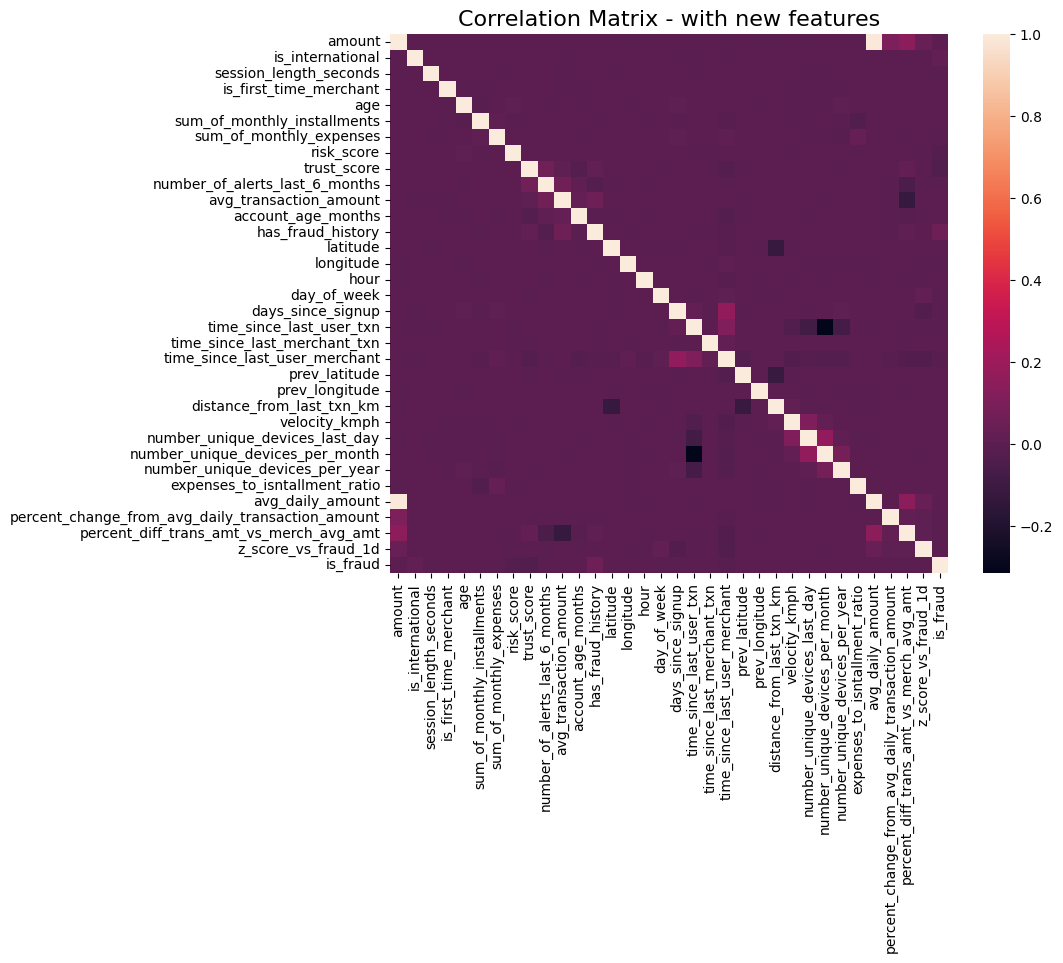

In [73]:
tmp = df.select_dtypes(include='number')
cols = [col for col in tmp.columns if col != 'is_fraud'] + ['is_fraud']
tmp = tmp[cols]

plt.figure(figsize=(9, 7))
corr = tmp.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=False, fmt=".2f")
plt.title("Correlation Matrix - with new features", fontsize=16)
plt.show()

### 2.3. Fetaure importance with XGBOOST

In order to test our new columns, we will build a fairly simple model and retrieve feature importance from it.

In [74]:
cols_to_drop = ['transaction_id','user_id','timestamp','merchant_id','signup_date', 'currency']

df_xgb = df
df_xgb = df_xgb.drop(columns=cols_to_drop)

In [75]:
from sklearn.model_selection import train_test_split

X = df_xgb.drop('is_fraud',axis=1)
y = df_xgb['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
categorical_columns = [
    'channel', 'device', 'payment_method',
    'sex', 'education', 'primary_source_of_income',
    'country_user', 'category', 'country_merchant' 
]

Accuracy: 0.5677133333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.57      0.71    137320
           1       0.10      0.52      0.17     12680

    accuracy                           0.57    150000
   macro avg       0.51      0.55      0.44    150000
weighted avg       0.86      0.57      0.66    150000



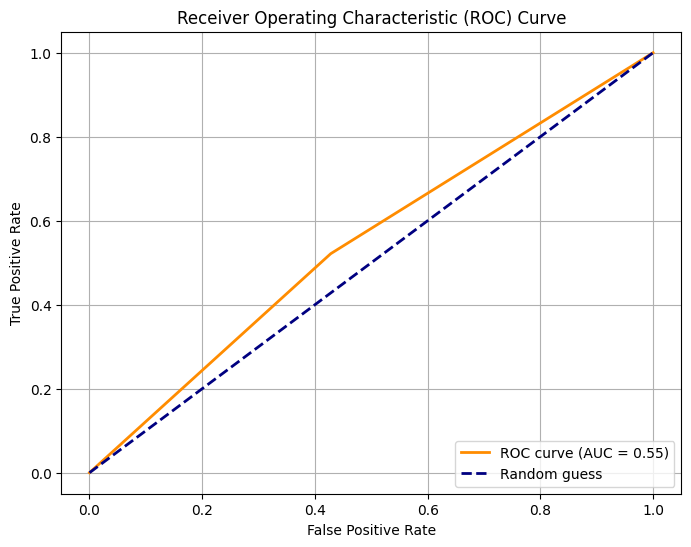

AUC: 0.5467181241448513


In [77]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
scale_pos_weight = class_weight_dict[1] / class_weight_dict[0]  

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'logloss',        
    'eta': 0.1,                      
    'max_depth': 6,                   
    'subsample': 0.8,                 
    'colsample_bytree': 0.8,         
    'scale_pos_weight': scale_pos_weight  
}

num_round = 100  
bst = xgb.train(params, dtrain, num_round)

y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc}')

The XGBoost model achieved **accuracy = $56.8\%$**, which in the context of a highly unbalanced dataset (where $91\%$ of cases are `is_fraud = 0`) is not good enough. Despite the **high precision for class 0 (legit)**, the effectiveness in detecting fraud (class 1) is very limited:

* The Recall (fraud) score indicates, that the model finds about half of the frauds.
* Based on Precision (fraud) score, most cases flagged as fraud are false positives.
* A very low AUC value, suggesting that the model **has a problem with class distinction**.

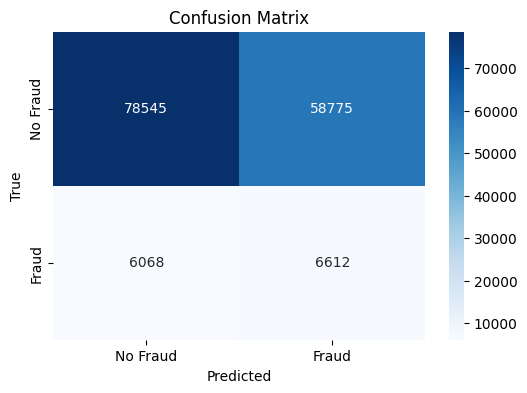

In [78]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A very high number of **false positives (FP)** - as many as **58,775 cases** were misclassified as fraud, despite being correct. At the same time, **as many as 6,068 frauds (FN)** went undetected.

This indicates that the model did not find clear signals in the data that would allow it to accurately classify events.

Below, we have a list of all features with their importance:

Feature Importance (using weight):
{'amount': 155.0, 'channel': 23.0, 'device': 27.0, 'payment_method': 24.0, 'is_international': 56.0, 'session_length_seconds': 234.0, 'is_first_time_merchant': 14.0, 'age': 148.0, 'sex': 21.0, 'education': 38.0, 'primary_source_of_income': 57.0, 'sum_of_monthly_installments': 198.0, 'sum_of_monthly_expenses': 157.0, 'country_user': 93.0, 'risk_score': 280.0, 'category': 46.0, 'country_merchant': 82.0, 'trust_score': 233.0, 'number_of_alerts_last_6_months': 72.0, 'avg_transaction_amount': 200.0, 'account_age_months': 144.0, 'has_fraud_history': 37.0, 'latitude': 210.0, 'longitude': 219.0, 'hour': 104.0, 'day_of_week': 39.0, 'days_since_signup': 250.0, 'time_since_last_user_txn': 209.0, 'time_since_last_merchant_txn': 242.0, 'time_since_last_user_merchant': 52.0, 'prev_latitude': 230.0, 'prev_longitude': 216.0, 'distance_from_last_txn_km': 249.0, 'velocity_kmph': 197.0, 'number_unique_devices_last_day': 7.0, 'number_unique_devices_per_month': 16.0, 'num

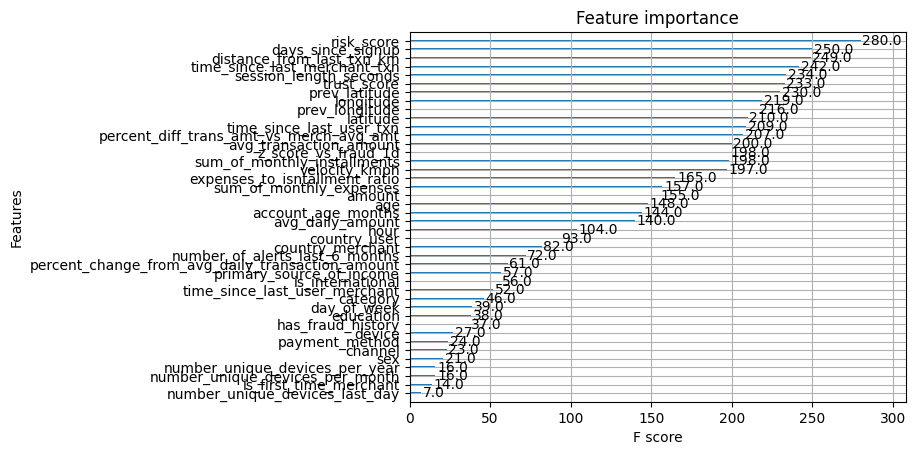

In [79]:
importance = bst.get_score(importance_type='weight')  


print("Feature Importance (using weight):")
print(importance)


xgb.plot_importance(bst, importance_type='weight') 
plt.show()

Feature Importance (using gain):
{'amount': 46.4998893737793, 'channel': 45.62879943847656, 'device': 41.872215270996094, 'payment_method': 41.7870979309082, 'is_international': 75.76641082763672, 'session_length_seconds': 45.05442428588867, 'is_first_time_merchant': 49.624454498291016, 'age': 46.701480865478516, 'sex': 43.92332077026367, 'education': 43.66434097290039, 'primary_source_of_income': 44.676422119140625, 'sum_of_monthly_installments': 44.41781234741211, 'sum_of_monthly_expenses': 46.77961730957031, 'country_user': 46.09554672241211, 'risk_score': 64.54105377197266, 'category': 44.146202087402344, 'country_merchant': 45.00777053833008, 'trust_score': 85.20732116699219, 'number_of_alerts_last_6_months': 45.70701599121094, 'avg_transaction_amount': 47.704837799072266, 'account_age_months': 43.58904266357422, 'has_fraud_history': 717.7326049804688, 'latitude': 44.85619354248047, 'longitude': 43.84307098388672, 'hour': 45.085079193115234, 'day_of_week': 48.64282989501953, 'days

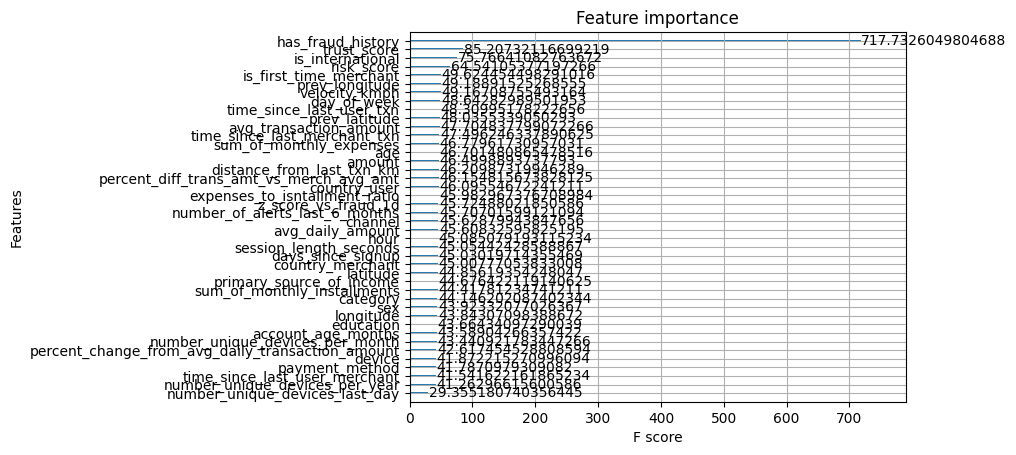

In [80]:
importance = bst.get_score(importance_type='gain')  

print("Feature Importance (using gain):")
print(importance)

xgb.plot_importance(bst, importance_type='gain') 
plt.show()

**Potential problems**:
* Lack of correlation with the target variable - despite the abundance of variables, their relationship with is_fraud may be too weak.

* Synthetic data - artificially generated data often lacks realistic and strong logical or sequential relationships.


## 3. Models

As simpler models do not predict the target so well, we decided to implement a LSTM.

**Long Short-Term Memory (LSTM)** is an enhanced version of the **Recurrent Neural Network (RNN)**. LSTMs can capture long-term dependencies in sequential data making them ideal for tasks like language translation, speech recognition and time series forecasting.

Unlike traditional RNNs which use a single hidden state passed through time LSTMs introduce a memory cell that holds information over extended periods addressing the challenge of learning long-term dependencies.

**LSTM architectures** involves the memory cell which is controlled by three gates: the input gate, the forget gate and the output gate. These gates decide what information to add to, remove from and output from the memory cell.

* Input gate: Controls what information is added to the memory cell.
* Forget gate: Determines what information is removed from the memory cell.
* Output gate: Controls what information is output from the memory cell.

![gate_of_lstm](https://media.geeksforgeeks.org/wp-content/uploads/20250404172141987003/gate_of_lstm.webp)

This allows LSTM networks to selectively retain or discard information as it flows through the network which allows them to learn long-term dependencies. The network has a hidden state which is like its short-term memory. This memory is updated using the current input, the previous hidden state and the current state of the memory cell.


Source: https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/

### 3.1. Initial LSTM model with all features
Even if the results for all features were not the best in case of xgboost, we still decided to try applying all of them to the neural network, to see how they work in this case.


In [81]:
binary_cols = [ 'is_international', 'is_first_time_merchant', 'has_fraud_history' ]

In [82]:
numerical_cols = [col for col in df.columns if col not in categorical_columns]
numerical_cols = [col for col in numerical_cols if col not in binary_cols]
numerical_cols = [col for col in numerical_cols if col!="is_fraud"]
numerical_cols = [col for col in numerical_cols if col not in ['transaction_id','user_id','timestamp','merchant_id','signup_date', 'currency']]
numerical_cols

['amount',
 'session_length_seconds',
 'age',
 'sum_of_monthly_installments',
 'sum_of_monthly_expenses',
 'risk_score',
 'trust_score',
 'number_of_alerts_last_6_months',
 'avg_transaction_amount',
 'account_age_months',
 'latitude',
 'longitude',
 'hour',
 'day_of_week',
 'days_since_signup',
 'time_since_last_user_txn',
 'time_since_last_merchant_txn',
 'time_since_last_user_merchant',
 'prev_latitude',
 'prev_longitude',
 'distance_from_last_txn_km',
 'velocity_kmph',
 'number_unique_devices_last_day',
 'number_unique_devices_per_month',
 'number_unique_devices_per_year',
 'expenses_to_isntallment_ratio',
 'avg_daily_amount',
 'percent_change_from_avg_daily_transaction_amount',
 'percent_diff_trans_amt_vs_merch_avg_amt',
 'z_score_vs_fraud_1d']

In [ ]:
df_lstm_1 = df

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Process categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_lstm_1[col] = le.fit_transform(df_lstm_1[col].astype(str))
    label_encoders[col] = le

# Process binary variables
for col in binary_cols:
    df_lstm_1[col] = df_lstm_1[col].astype(int)

# Normalize numerical features
scaler = MinMaxScaler()
df_lstm_1[numerical_cols] = scaler.fit_transform(df_lstm_1[numerical_cols])

In [ ]:
# Create Transaction-Count-Based Sequences
target_column = 'is_fraud'
user_column = 'user_id'
sequence_length = 7    # Last 7 transactions to consider
padding_value = 0  

data_sequences = []
labels = []
sequence_indices = []  # To track which rows correspond to which sequences

# Group by user
grouped = df_lstm_1.groupby(user_column)

for user_id, user_data in grouped:
    # Sort by timestamp to ensure chronological order
    user_data = user_data.sort_values(by='timestamp')
    
    # Convert to numpy arrays
    user_data_values = user_data[numerical_cols].values
    
    for i in range(len(user_data)):
        # Get indices of previous transactions (up to sequence_length-1)
        start_idx = max(0, i - (sequence_length - 1))
        window_indices = range(start_idx, i + 1)
        
        # Get the sequence of transactions
        window_data = user_data_values[window_indices]
        
        # Pad if fewer than sequence_length transactions
        if len(window_data) < sequence_length:
            pad_length = sequence_length - len(window_data)
            padding = np.full((pad_length, len(numerical_cols)), padding_value)
            window_data = np.vstack([padding, window_data])
        
        data_sequences.append(window_data)
        labels.append(user_data[target_column].iloc[i])
        sequence_indices.append(user_data.index[i])  # Store the original index

# Convert to numpy arrays
data_sequences = np.array(data_sequences)
labels = np.array(labels)

In [85]:
# Create DataFrame index to position mapping
index_to_pos = {idx: pos for pos, idx in enumerate(df.index)}

# Get the positions of the last transaction in each sequence
seq_positions = [index_to_pos[idx] for idx in sequence_indices]

# Split into train and test sets (80-20 split)
(X_seq_train, X_seq_test, 
 seq_pos_train, seq_pos_test,
 y_train, y_test) = train_test_split(
    data_sequences,
    seq_positions,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# Prepare input dictionaries
def create_input_dict(sequences, positions, df):
    inputs = {'numerical_seq': sequences}
    
    # Add categorical inputs
    for col in categorical_columns:
        inputs[f'{col}_input'] = df.iloc[positions][col].values.reshape(-1, 1)
    
    # Add binary features
    inputs['binary_features'] = df.iloc[positions][binary_cols].values
    
    return inputs

train_data = create_input_dict(X_seq_train, seq_pos_train, df)
test_data = create_input_dict(X_seq_test, seq_pos_test, df)

In [86]:
from tensorflow.keras.models import load_model

# Analyze categorical feature cardinalities
categorical_cardinalities = {col: df[col].nunique() for col in categorical_columns}
embedding_dims = {
    col: min(50, max(2, card // 2 + 1)) 
    for col, card in categorical_cardinalities.items()
}

In [ ]:
def create_deep_rnn_model(sequence_length, numerical_cols, categorical_columns, binary_cols, 
                         categorical_cardinalities, embedding_dims):
    # Numerical sequence input (Deep LSTM path)
    numerical_input = Input(shape=(sequence_length, len(numerical_cols)), name='numerical_seq')
    
    # Deep LSTM layers (3 layers)
    masked_input = Masking(mask_value=0.0)(numerical_input)
    
    lstm_layer1 = LSTM(128, return_sequences=True, name='LSTM_1')(masked_input)
    lstm_layer1 = LayerNormalization()(lstm_layer1)
    
    lstm_layer2 = LSTM(128, return_sequences=True, name='LSTM_2')(lstm_layer1)
    lstm_layer2 = LayerNormalization()(lstm_layer2)
    
    lstm_layer3 = LSTM(128, name='LSTM_3')(lstm_layer2)
    lstm_layer3 = LayerNormalization()(lstm_layer3)
    
    # Entity embeddings for categorical features
    categorical_inputs = []
    categorical_embeddings = []
    
    for col in categorical_columns:
        input_layer = Input(shape=(1,), name=f'{col}_input')
        categorical_inputs.append(input_layer)
        
        embedding = Embedding(
            input_dim=categorical_cardinalities[col] + 1,
            output_dim=embedding_dims[col],
            name=f'{col}_embedding',
            embeddings_regularizer=l2(1e-4)
        )(input_layer)
        
        flattened = Flatten()(embedding)
        flattened = Dropout(0.1)(flattened)
        categorical_embeddings.append(flattened)
    
    # Binary features input
    binary_input = Input(shape=(len(binary_cols),), name='binary_features')
    
    # Combine all features
    combined = Concatenate()([lstm_layer3] + categorical_embeddings + [binary_input])
    
    # Feedforward 
    x = Dense(256, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    # Output layer
    output = Dense(1, activation='sigmoid')(x)
    
    # Create model
    model = Model(
        inputs=[numerical_input] + categorical_inputs + [binary_input],
        outputs=output
    )
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

In [30]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ numerical_seq       │ (None, 7, 15)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, 7, 15)     │          0 │ numerical_seq[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_3 (Masking) │ (None, 7, 15)     │          0 │ numerical_seq[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_2 (Any)         │ (None, 7)         │          0 │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM_1 (LSTM)       │ (None, 7, 128)    │     73,728 │ masking_3[0][0],  │
│                     │                   │            │ any_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 7, 128)    │        256 │ LSTM_1[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM_2 (LSTM)       │ (None, 7, 128)    │    131,584 │ layer_normalizat… │
│                     │                   │            │ any_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ currency_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ device_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ payment_method_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country_x_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country_y_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sex_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ education_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ primary_source_of_… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,246,784 (4.76 MB)

 Trainable params: 415,338 (1.58 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 830,678 (3.17 MB)

In [22]:
model = create_deep_rnn_model(
    sequence_length=sequence_length,
    numerical_cols=numerical_cols,
    categorical_cols=categorical_cols,
    binary_cols=binary_cols,
    categorical_cardinalities=categorical_cardinalities,
    embedding_dims=embedding_dims
)

# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train the model
history = model.fit(
    train_data,
    y_train,
    batch_size=128,
    epochs=50,
    validation_data=(test_data, y_test),
    class_weight=class_weight_dict,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            mode='max',
            patience=7,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_auc',
            mode='max',
            factor=0.1,
            patience=5,
            min_lr=1e-6,
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            'best_model.keras',
            monitor='val_auc',
            mode='max',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=1
)

Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5223 - auc: 0.5292 - loss: 0.7502
Epoch 1: val_auc improved from -inf to 0.55966, saving model to best_model.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.5223 - auc: 0.5293 - loss: 0.7502 - val_accuracy: 0.5675 - val_auc: 0.5597 - val_loss: 0.6661 - learning_rate: 0.0010
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5027 - auc: 0.5551 - loss: 0.6909
Epoch 2: val_auc improved from 0.55966 to 0.56901, saving model to best_model.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.5027 - auc: 0.5551 - loss: 0.6909 - val_accuracy: 0.4965 - val_auc: 0.5690 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 3/50
3124/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4997 - auc: 0.5605 - loss: 0.6877
Epoch 3: val_auc did not improve from 0.56901
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 76s 24ms/step - accuracy: 0.4997 - auc: 0.5605 - loss: 0.6877 - val_accuracy: 0.5014 - val_auc:

In [32]:
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.6).astype(int)

print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_classes)))
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step
Accuracy: 0.7356

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     91518
           1       0.11      0.30      0.16      8482

    accuracy                           0.74    100000
   macro avg       0.52      0.54      0.50    100000
weighted avg       0.85      0.74      0.79    100000


Confusion Matrix:
[[70987 20531]
 [ 5911  2571]]


The LSTM model achieved a high overall accuracy, which at first glance may appear promising. However, a deeper look at class-wise performance metrics reveals a critical shortcoming: the model **completely fails to identify any fraudulent transactions**.

**All fraudulent transactions were misclassified** as non-fraud - the model only predicts class 0 (non-fraud) for all inputs.

Therefore, we aborted an idea to add any of the engineered features, and instead train the model on initial dataset.